<a href="https://colab.research.google.com/github/krymsza/combustion-simulation/blob/main/CH3NO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####info
```
Flash point	35 °C (95 °F; 308 K)
Autoignition temperature	418 °C (784 °F; 691 K)
Explosive limits	7–22%
```

``` 
mix: 10% nitromethane / 90% air
```

#### env setup 

##### imports

In [22]:
!apt-get -qq update -y
!apt-get -qq install -y python3-software-properties
!apt-add-repository -y ppa:speth/cantera > /dev/null 2>&1
#!apt-get -qq install -y cantera #-python3

In [23]:
!pip install cantera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import os
import csv

In [25]:
#%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import matplotlib.pyplot as plt

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 120

plt.style.use("ggplot")
plt.style.use("seaborn-pastel")

<ipython-input-25-aa90971231eb>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


##### downloading yaml files with nitromethane data

In [26]:
 #Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pathlib import Path
import os

def download_and_save(file_name, file_id):
  downloaded = drive.CreateFile({'id': file_id})
  # fetch file
  downloaded.FetchContent()
  # write file
  with open(file_name,'wb') as f:
       f.write(downloaded.content.read())
      
  print(f'Saved {file_name}')
  
FILE_NAME, FILE_ID = ['file_name', 'file_id']

In [27]:
#https://drive.google.com/file/d/11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf/view?usp=share_link

In [28]:
dataset_path = Path('/usr/local/lib/python3.10/dist-packages/cantera/data/'); dataset_path
!mkdir -p $dataset_path
#!ls -la $dataset_path

In [29]:
file = {FILE_NAME: 'Fuller.yaml', FILE_ID: '11sqBetyJwxAl5lKh2Xcps5MGUusZZ6xf'}
file_path = dataset_path / file[FILE_NAME]
download_and_save(file_path, file[FILE_ID])

Saved /usr/local/lib/python3.10/dist-packages/cantera/data/Fuller.yaml


##### create solution with fuller file

In [30]:
gas = ct.Solution('Fuller.yaml')

<ipython-input-30-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-30-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-30-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-30-feab91796c39>:1: UserWarning: NasaPoly2::validate: 
For species

#### gas & reservoirs

In [510]:
#AIR
air = ct.Solution('Fuller.yaml')
air.TPX = 300, ct.one_atm, 'O2:1. N2:3.76'
air_res = ct.Reservoir(contents=air)

<ipython-input-510-3ea0aa086211>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  air = ct.Solution('Fuller.yaml')
<ipython-input-510-3ea0aa086211>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  air = ct.Solution('Fuller.yaml')
<ipython-input-510-3ea0aa086211>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  air = ct.Solution('Fuller.yaml')
<ipython-input-510-3ea0aa086211>:2: UserWarning: NasaPoly2::validate: 
For spe

In [511]:
#FUEL
gas = ct.Solution('Fuller.yaml')
gas.TPX = 280, 10*ct.one_atm,  'CH3NO2:1'
fuel_res = ct.Reservoir(contents=gas)

<ipython-input-511-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution('Fuller.yaml')
<ipython-input-511-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033332

  gas = ct.Solution('Fuller.yaml')
<ipython-input-511-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For species NCCH2CHO, discontinuity in cp/R detected at Tmid = 3000.0
	Value computed using low-temperature polynomial:  20.571572253
	Value computed using high-temperature polynomial: 160791.50503847003

  gas = ct.Solution('Fuller.yaml')
<ipython-input-511-314431b8301e>:2: UserWarning: NasaPoly2::validate: 
For spe

In [512]:
#IGNITER
gas.TPX = 1000, 10*ct.one_atm, 'H:1.0' 
igniter = ct.Reservoir(gas)

In [513]:
#COMBUSTOR FILLED WITH AIR
air.TP = 300, ct.one_atm
vol = 0.0005   #0.5L combustor volume[m3]  0,001 m³=1L
combustor = ct.Reactor(air)
combustor.volume = vol

#### injector

In [514]:
#air.density * vol(0.0005) = masa air [kg]
air_mass = air.density * vol
#air_mass / 1.806  = masa paliwa [kg]
fuel_mass = air_mass / 1.806

print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )
fuel_mass = fuel_mass/3.0
print(fuel_mass, air_mass, ' ratio:', fuel_mass/air_mass*100, '%' )

0.0003244695319135037 0.0005859919746357878  ratio: 55.370985603543744 %
0.00010815651063783457 0.0005859919746357878  ratio: 18.456995201181243 %


In [515]:
injector_mass = fuel_mass  # kg

# injector is modeled as a mass flow controller
injector_mfc = ct.MassFlowController(fuel_res, combustor)

injector_mfc.mass_flow_coeff = injector_mass / 0.2
injector_mfc.set_time_function(lambda t: np.exp(-10 * (t - 1)**2))
injector_mfc.mass_flow_coeff

0.0005407825531891728

#### igniter setup

In [516]:
'''def fuel_mdot(t):
    """Create an inlet for the fuel, supplied as a Gaussian pulse"""
    total = fuel_mass/300  # mass of fuel [kg]
    width = 0.0005 #5  # width of the pulse [s]
    t0 = 0.0025  # time of fuel pulse peak [s]
    amplitude = (total / (width * np.sqrt(2*np.pi)))
    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))'''

'def fuel_mdot(t):\n    """Create an inlet for the fuel, supplied as a Gaussian pulse"""\n    total = fuel_mass/300  # mass of fuel [kg]\n    width = 0.0005 #5  # width of the pulse [s]\n    t0 = 0.0025  # time of fuel pulse peak [s]\n    amplitude = (total / (width * np.sqrt(2*np.pi)))\n    return amplitude * np.exp(-(t-t0)**2 / (2*width**2))'

In [517]:
'''#IGNITER
fwhm = 0.08 #5              
t0 = 2.0 #0.005
total = 3.0e-6   # mass of fuel [kg]
amplitude = total / (fwhm * np.sqrt(2*np.pi))

igniter_mdot = lambda t: amplitude * np.exp(-(t-t0)**2 / (2*fwhm**2))'''

'#IGNITER\nfwhm = 0.08 #5              \nt0 = 2.0 #0.005\ntotal = 3.0e-6   # mass of fuel [kg]\namplitude = total / (fwhm * np.sqrt(2*np.pi))\n\nigniter_mdot = lambda t: amplitude * np.exp(-(t-t0)**2 / (2*fwhm**2))'

In [518]:
#m_fuel_comb = ct.MassFlowController(fuel_res, combustor, mdot = fuel_mdot)
#m_igniter_comb = ct.MassFlowController(igniter, combustor, mdot = igniter_mdot)

In [519]:
ignit_mass = fuel_mass/10000  # kg

# injector is modeled as a mass flow controller
ignit_mfc = ct.MassFlowController(igniter, combustor)

ignit_mfc.mass_flow_coeff = ignit_mass / 1.8
ignit_mfc.set_time_function(lambda t: np.exp(-10 * (t - 2)**2))
ignit_mfc.mass_flow_coeff

6.008695035435254e-09

#### simulation

In [520]:
sim = ct.ReactorNet([combustor])

In [521]:
print('  c.T:'+ str(combustor.T)+ '  c.P: '+
         str(combustor.thermo.P/ct.one_atm))

  c.T:300.0  c.P: 1.0000000000000002


In [522]:
time = 0.3
n_steps = 1000000
states = ct.SolutionArray(gas, extra=['t', 'V'])


for n in range(n_steps):
    time += 2.5e-5  #7
    sim.advance(time)
    print(str(n) + '->'+ str(time) +  '  c.T:'+ str(combustor.T)+ '  c.P: '+
         str(combustor.thermo.P/ct.one_atm))
    states.append(combustor.thermo.state, t=time, V=combustor.volume)
    n+=1
#FUEL t0 = 0.0025 / IGNITER t0 = 0.005

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
10035->0.5509000000000853  c.T:300.36233325909825  c.P: 1.006665053109624
10036->0.5509250000000854  c.T:300.36242854518605  c.P: 1.006666825435805
10037->0.5509500000000854  c.T:300.3625238520487  c.P: 1.0066685981588186
10038->0.5509750000000855  c.T:300.3626191796894  c.P: 1.0066703712787317
10039->0.5510000000000855  c.T:300.36271452811144  c.P: 1.0066721447956113
10040->0.5510250000000856  c.T:300.36280989731785  c.P: 1.0066739187095228
10041->0.5510500000000856  c.T:300.36290528731206  c.P: 1.0066756930205343
10042->0.5510750000000857  c.T:300.3630006980971  c.P: 1.0066774677287107
10043->0.5511000000000857  c.T:300.36309612967636  c.P: 1.0066792428341196
10044->0.5511250000000858  c.T:300.36319158205276  c.P: 1.0066810183368264
10045->0.5511500000000858  c.T:300.36328705522965  c.P: 1.0066827942368979
10046->0.5511750000000859  c.T:300.36338254921014  c.P: 1.0066845705344005
10047->0.551200000000086  c.T:300.363478

CanteraError: ignored

#### results

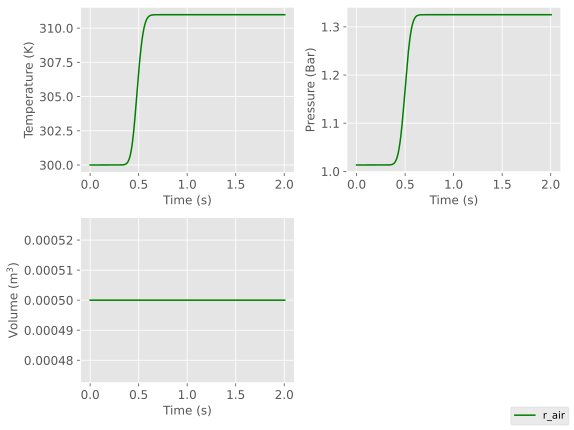

In [98]:
plt.figure(figsize=(8, 6), dpi=40)
plt.subplot(2, 2, 1)
h = plt.plot(states.t, states.T, 'g-')#, states_r_air.t, states_r_air.T, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(states.t, states.P / 1e5, 'g-')#, states_r_air.t, states_r_air.P / 1e5, 'b-')
# plt.legend(['r_air','combustor'], 2)
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Bar)')

plt.subplot(2, 2, 3)
plt.plot(states.t, states.V, 'g-')#, states_r_air.t, states_r_air.V, 'b-')
# plt.legend(['r_air','combustor'], 2)
plt.xlabel('Time (s)')
plt.ylabel('Volume (m$^3$)')

# czy zmiana kolejności napraiw błąd??? 
plt.figlegend(h, ['r_air', 'combustor'], loc='lower right')
plt.tight_layout()
plt.savefig('foo1.png')
plt.show()


In [ ]:
states.element_names

['C', 'H', 'N', 'O', 'Ar', 'He']

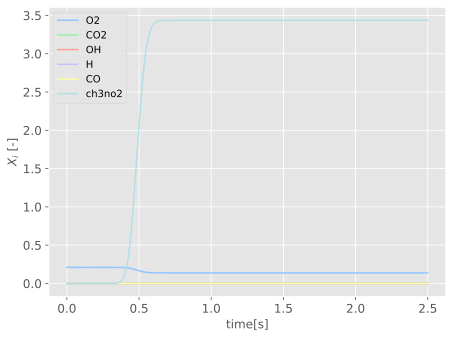

In [ ]:
# gas composition
xticks = np.arange(0, 0.18, 0.02)
fig, ax = plt.subplots()
#ax.plot(states_combustor.t, states_combustor.T, label='TEMP(K)')
ax.plot(states.t, states('o2').X, label='O2')
ax.plot(states.t, states('co2').X, label='CO2')
ax.plot(states.t, states('oh').X, label='OH')
ax.plot(states.t, states('h').X, label='H')
ax.plot(states.t, states('co').X, label='CO')
ax.plot(states.t, states('ch3no2').X * 10, label='ch3no2')
ax.legend(loc=0)
ax.set_ylabel('$X_i$ [-]')
ax.set_xlabel(r'time[s]')
#ax.set_xticks(xticks)
#ax.set_xticklabels(ca_ticks(xticks))
plt.show()